In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('C:/Users/HAYJAY/PycharmProjects/20-restaurant-sales/data/train.csv')
test = pd.read_csv('C:/Users/HAYJAY/PycharmProjects/20-restaurant-sales/data/test.csv')

In [3]:
train.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [4]:
test.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,...,2.0,3.0,0,0,0,0,0,0,0,0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,2.0,3.0,0,4,0,0,0,0,0,0
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,5.0,3.0,0,0,0,0,0,0,0,0


In [5]:
print(train.City.unique)
print(train.Type.unique())
print(train['City Group'].unique())

<bound method Series.unique of 0        İstanbul
1          Ankara
2      Diyarbakır
3           Tokat
4       Gaziantep
          ...    
132       Trabzon
133         İzmir
134       Kayseri
135      İstanbul
136      İstanbul
Name: City, Length: 137, dtype: object>
['IL' 'FC' 'DT']
['Big Cities' 'Other']


In [6]:
print(test.City.unique)
print(test.Type.unique())
print(test['City Group'].unique())

<bound method Series.unique of 0                 Niğde
1                 Konya
2                Ankara
3               Kocaeli
4        Afyonkarahisar
              ...      
99995           Antalya
99996             Niğde
99997          İstanbul
99998          İstanbul
99999          İstanbul
Name: City, Length: 100000, dtype: object>
['FC' 'IL' 'DT' 'MB']
['Other' 'Big Cities']


In [7]:
train.groupby(train['City Group']).City.value_counts()

City Group  City          
Big Cities  İstanbul          50
            Ankara            19
            İzmir              9
Other       Bursa              5
            Samsun             5
            Antalya            4
            Sakarya            4
            Adana              3
            Diyarbakır         3
            Eskişehir          3
            Kayseri            3
            Tekirdağ           3
            Aydın              2
            Konya              2
            Muğla              2
            Trabzon            2
            Afyonkarahisar     1
            Amasya             1
            Balıkesir          1
            Bolu               1
            Denizli            1
            Edirne             1
            Elazığ             1
            Gaziantep          1
            Isparta            1
            Karabük            1
            Kastamonu          1
            Kocaeli            1
            Kütahya            1
            Kırk

#### some citties such as Instanbul and Ankara are grouped under Big citites and Other in the test data

In [80]:
test.groupby(train['City Group']).City.value_counts()

City Group  City          
Big Cities  İstanbul          21
            Ankara             8
            Antalya            5
            Denizli            3
            İzmir              3
            Adana              2
            Bursa              2
            Edirne             2
            Eskişehir          2
            Kocaeli            2
            Konya              2
            Muğla              2
            Niğde              2
            Samsun             2
            Trabzon            2
            Zonguldak          2
            Aydın              1
            Balıkesir          1
            Batman             1
            Bilecik            1
            Bolu               1
            Düzce              1
            Erzurum            1
            Gaziantep          1
            Giresun            1
            Hatay              1
            Kars               1
            Malatya            1
            Mardin             1
            Rize

In [9]:
target = train['revenue']

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
Id            137 non-null int64
Open Date     137 non-null object
City          137 non-null object
City Group    137 non-null object
Type          137 non-null object
P1            137 non-null int64
P2            137 non-null float64
P3            137 non-null float64
P4            137 non-null float64
P5            137 non-null int64
P6            137 non-null int64
P7            137 non-null int64
P8            137 non-null int64
P9            137 non-null int64
P10           137 non-null int64
P11           137 non-null int64
P12           137 non-null int64
P13           137 non-null float64
P14           137 non-null int64
P15           137 non-null int64
P16           137 non-null int64
P17           137 non-null int64
P18           137 non-null int64
P19           137 non-null int64
P20           137 non-null int64
P21           137 non-null int64
P22           137 non-nul

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 42 columns):
Id            100000 non-null int64
Open Date     100000 non-null object
City          100000 non-null object
City Group    100000 non-null object
Type          100000 non-null object
P1            100000 non-null int64
P2            100000 non-null float64
P3            100000 non-null float64
P4            100000 non-null float64
P5            100000 non-null int64
P6            100000 non-null int64
P7            100000 non-null int64
P8            100000 non-null int64
P9            100000 non-null int64
P10           100000 non-null int64
P11           100000 non-null int64
P12           100000 non-null int64
P13           100000 non-null float64
P14           100000 non-null int64
P15           100000 non-null int64
P16           100000 non-null int64
P17           100000 non-null int64
P18           100000 non-null int64
P19           100000 non-null int64
P20           

In [12]:
train['ODT'] = pd.to_datetime(train['Open Date']) 

In [13]:
test['ODT'] = pd.to_datetime(test['Open Date']) 

In [14]:
train.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P30,P31,P32,P33,P34,P35,P36,P37,revenue,ODT
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,5,3,4,5,5,4,3,4,5653753.0,1999-07-17
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,0,0,0,0,0,0,0,0,6923131.0,2008-02-14
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,0,0,0,0,0,0,0,0,2055379.0,2013-03-09
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,25,12,10,6,18,12,12,6,2675511.0,2012-02-02
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,5,1,3,2,3,4,3,3,4316715.0,2009-05-09


In [15]:
test.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,ODT
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,2011-01-22
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,2011-03-18
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,2013-10-30
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,3.0,0,4,0,0,0,0,0,0,2013-05-06
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,2013-07-31


In [16]:
train = train.assign(Day = train.ODT.dt.day, Month = train.ODT.dt.month, Year = train.ODT.dt.year)
train.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P33,P34,P35,P36,P37,revenue,ODT,Day,Month,Year
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,5,5,4,3,4,5653753.0,1999-07-17,17,7,1999
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,0,0,0,0,0,6923131.0,2008-02-14,14,2,2008
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,0,0,0,0,0,2055379.0,2013-03-09,9,3,2013
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,6,18,12,12,6,2675511.0,2012-02-02,2,2,2012
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,2,3,4,3,3,4316715.0,2009-05-09,9,5,2009


In [17]:
test = test.assign(Day = test.ODT.dt.day, Month = test.ODT.dt.month, Year = test.ODT.dt.year)
test.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P32,P33,P34,P35,P36,P37,ODT,Day,Month,Year
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,...,0,0,0,0,0,0,2011-01-22,22,1,2011
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,...,0,0,0,0,0,0,2011-03-18,18,3,2011
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,0,0,0,0,0,0,2013-10-30,30,10,2013
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,0,0,0,0,0,0,2013-05-06,6,5,2013
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,0,0,0,0,0,0,2013-07-31,31,7,2013


In [18]:
train.drop(['Open Date', 'ODT'], axis = 1, inplace = True)

In [19]:
test.drop(['Open Date', 'ODT'], axis = 1, inplace = True)

In [20]:
test.head()

,Id,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P31,P32,P33,P34,P35,P36,P37,Day,Month,Year
0,0,Niğde,Other,FC,1,4.0,4.0,4.0,1,2,...,0,0,0,0,0,0,0,22,1,2011
1,1,Konya,Other,IL,3,4.0,4.0,4.0,2,2,...,0,0,0,0,0,0,0,18,3,2011
2,2,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,2,...,0,0,0,0,0,0,0,30,10,2013
3,3,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,3,...,4,0,0,0,0,0,0,6,5,2013
4,4,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,2,...,0,0,0,0,0,0,0,31,7,2013


In [21]:
features = train.drop(['Id', 'revenue'], axis = 1)

In [22]:
new_test=test.drop('Id', axis = 1)

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
cat_features = ['City', 'City Group', 'Type']
encoder = LabelEncoder()

In [25]:
# Using Label Encoder to encode the categorical features
encoded = features[cat_features].apply(encoder.fit_transform)
test_encoded = new_test[cat_features].apply(encoder.fit_transform)

In [26]:
encoded.head()

,City,City Group,Type
0,31,0,2
1,3,0,1
2,10,1,2
3,28,1,2
4,14,1,2


In [27]:
features.head()

,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,...,P31,P32,P33,P34,P35,P36,P37,Day,Month,Year
0,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,...,3,4,5,5,4,3,4,17,7,1999
1,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,...,0,0,0,0,0,0,0,14,2,2008
2,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,...,0,0,0,0,0,0,0,9,3,2013
3,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,...,12,10,6,18,12,12,6,2,2,2012
4,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,...,1,3,2,3,4,3,3,9,5,2009


In [28]:
data = features[features.columns[3:]].join(encoded)
data.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P34,P35,P36,P37,Day,Month,Year,City,City Group,Type
0,4,5.0,4.0,4.0,2,2,5,4,5,5,...,5,4,3,4,17,7,1999,31,0,2
1,4,5.0,4.0,4.0,1,2,5,5,5,5,...,0,0,0,0,14,2,2008,3,0,1
2,2,4.0,2.0,5.0,2,3,5,5,5,5,...,0,0,0,0,9,3,2013,10,1,2
3,6,4.5,6.0,6.0,4,4,10,8,10,10,...,18,12,12,6,2,2,2012,28,1,2
4,3,4.0,3.0,4.0,2,2,5,5,5,5,...,3,4,3,3,9,5,2009,14,1,2


In [29]:
test_data = new_test[new_test.columns[3:]].join(test_encoded)
test_data.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P34,P35,P36,P37,Day,Month,Year,City,City Group,Type
0,1,4.0,4.0,4.0,1,2,5,4,5,5,...,0,0,0,0,22,1,2011,38,1,1
1,3,4.0,4.0,4.0,2,2,5,3,4,4,...,0,0,0,0,18,3,2011,27,1,2
2,3,4.0,4.0,4.0,2,2,5,4,4,5,...,0,0,0,0,30,10,2013,3,0,1
3,2,4.0,4.0,4.0,2,3,5,4,5,4,...,0,0,0,0,6,5,2013,26,1,2
4,2,4.0,4.0,4.0,1,2,5,4,5,4,...,0,0,0,0,31,7,2013,1,1,1


In [56]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [30]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMRegressor

In [31]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [32]:
# Using LGBMRegressor with default parameters
model = LGBMRegressor()

In [81]:
# Using RepeatedKFold
m_scores = cross_val_score(model, data, target, scoring='neg_mean_squared_error', cv=cv).mean()

In [82]:
np.sqrt(-m_scores)

2529166.1796772145

In [47]:
# Iterating to get the best value for cv
cv_range = range(2, 30)
cv_scores = []
for c_v in cv_range:
    n_scores = np.sqrt(-cross_val_score(model, data, target, scoring='neg_mean_squared_error', cv=c_v, n_jobs=-1).mean()) # error_score='raise')
    cv_scores.append(n_scores)
print (cv_scores)

[2490019.301394434, 2507033.605483417, 2742909.845783371, 2547339.765675879, 2525699.952890214, 2487475.3632587395, 2507850.856904604, 2463891.4186418187, 2496609.2710543517, 2516478.1643877374, 2461800.805301687, 2480296.960155232, 2490862.4110713415, 2460031.4890243043, 2553356.7671127226, 2576055.0181839387, 2550680.081954113, 2479357.4577143607, 2556014.0348540256, 2541231.346949304, 2528782.796378503, 2591316.012055648, 2543763.978064311, 2602140.695349709, 2584540.742562202, 2589300.6553161913, 2509136.6909006913, 2518339.775897854]


Text(0, 0.5, 'Cross validated error')

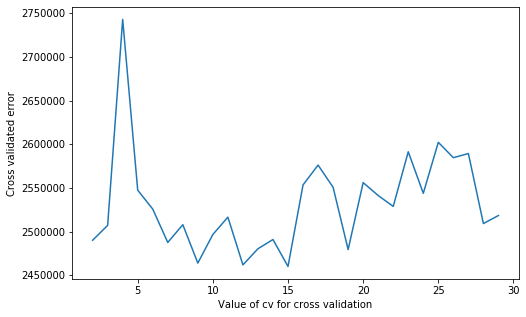

In [86]:
plt.figure(figsize=(8,5))
plt.plot(cv_range, cv_scores)
plt.xlabel('Value of cv for cross validation')
plt.ylabel('Cross validated error')

In [49]:
print("The lowest score is {} at a cv value of {}" .format(np.min(cv_scores), cv_scores.index(min(cv_scores))+2))

The lowest score is 2460031.4890243043 at a cv value of 28


In [50]:
# Using Train test spilt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

In [51]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 0.30, random_state = 1) 

In [52]:
tts = model.fit(x_train, y_train)

In [53]:
tts_pred = model.predict(x_test)

In [54]:
np.sqrt(mse(y_test, tts_pred))

2827630.627179419

In [55]:
test_predictions = model.predict(test_data)

In [70]:
output = pd.DataFrame({'Id' : test.Id, 'Revenue' : test_predictions}).set_index('Id')

#### Test data predictions

In [71]:
output

,Revenue
Id,
0,4.489392e+06
1,2.995897e+06
2,3.035937e+06
3,2.443699e+06
4,4.020949e+06
...,...
99995,3.530714e+06
99996,4.222926e+06
99997,6.749435e+06
